In [1]:
import numpy as np

from interfacePy.Axion import Axion 
from interfacePy.Cosmo import Hubble

import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt


plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=14
plt.rcParams['mathtext.fontset']='stix'

In [2]:
theta_i, fa=0.945, 1e12

tmax=500
TSTOP=1e-4
ratio_ini=1e2

N_convergence_max, convergence_lim=3, 1e-2 #this is fine, but you can experiment a bit. 

#radiatin dominated example
inputFile="InputExamples/RDinput.dat" 

# non-standard cosmological example. 
# the NSC parameters (using the notation of 2012.07202) are:
# T_end=1e-1 (GeV), c=2, T_ini=1e7 (GeV), and r=1e-3
# inputFile="InputExamples/NSCinput.dat" 

In [3]:
ax=Axion(theta_i, fa, tmax, TSTOP, ratio_ini, N_convergence_max, convergence_lim, inputFile)

In [4]:
ax.solve();

time:  0.0817728042602539  s


In [5]:
ax.relic

0.12019793598673152

In [6]:
ax.getPeaks()
ax.getPoints()

<IPython.core.display.Javascript object>


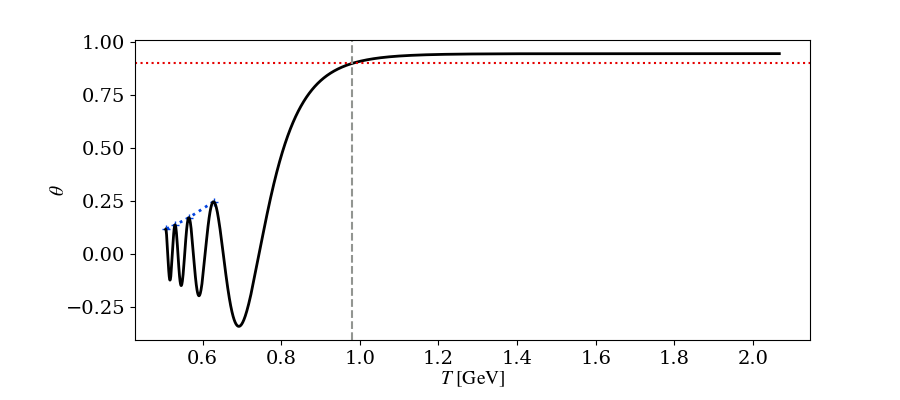

In [7]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    
    sub.plot(ax.T_peak,ax.theta_peak,linestyle=':',marker='+',color='xkcd:blue',linewidth=2)

    sub.plot(ax.T,ax.theta,linestyle='-',linewidth=2,alpha=1,c='xkcd:black')

    
    sub.set_yscale('linear')
    sub.set_xscale('linear')
    
    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'$\theta$')
    sub.yaxis.set_label_coords(-0.1,0.5) 

    sub.axhline(ax.theta_osc,linestyle=':',color='xkcd:red',linewidth=1.5)
    sub.axvline(ax.T_osc,linestyle='--',color='xkcd:gray',linewidth=1.5)
   
    fig.show()

<IPython.core.display.Javascript object>


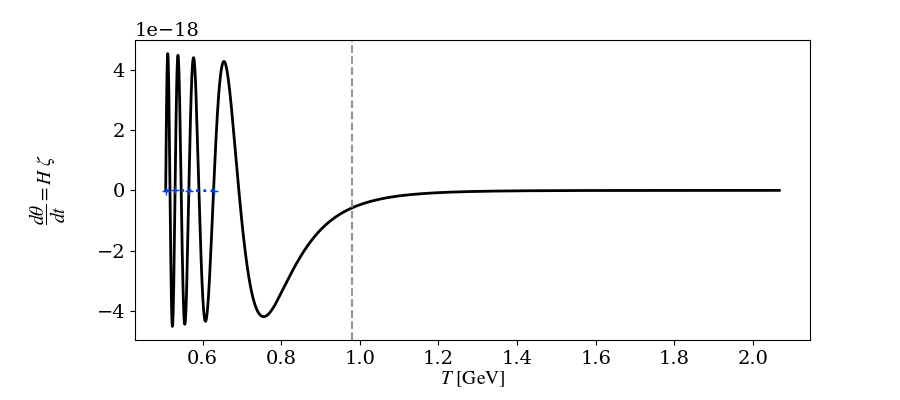

In [8]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    _H_=np.array([Hubble(T) for T in ax.T])
    sub.plot(ax.T,_H_*ax.zeta,linestyle='-',linewidth=2,alpha=1,c='xkcd:black')
    _H_=np.array([Hubble(T) for T in ax.T_peak])
    sub.plot(ax.T_peak,_H_*ax.zeta_peak,linestyle=':',marker='+',color='xkcd:blue',linewidth=2)
    
    sub.set_yscale('linear')
    sub.set_xscale('linear')
    
    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'$\dfrac{d \theta}{ dt } = H \ \zeta $')
    sub.yaxis.set_label_coords(-0.1,0.5) 

    sub.axvline(ax.T_osc,linestyle='--',color='xkcd:gray',linewidth=1.5)

    fig.show()

<IPython.core.display.Javascript object>


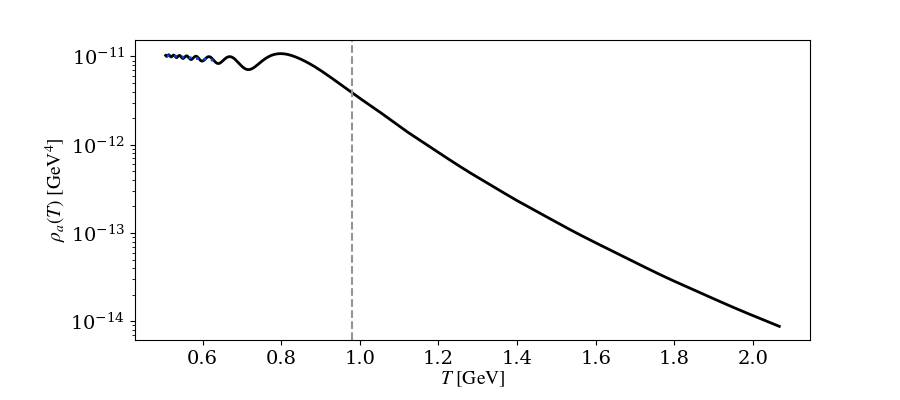

In [9]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    sub.plot(ax.T,ax.rho_axion,linestyle='-',linewidth=2,alpha=1,c='xkcd:black')
    sub.plot(ax.T_peak,ax.rho_axion_peak,linestyle=':',linewidth=2,alpha=1,c='xkcd:blue')

    sub.set_yscale('log')
    sub.set_xscale('linear')
    
    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'$\rho_{a}(T) ~[{\rm GeV}^{4}]$')
    sub.yaxis.set_label_coords(-0.1,0.5) 
    
    
    sub.axvline(ax.T_osc,linestyle='--',color='xkcd:gray',linewidth=1.5)
    
    fig.show()

In [10]:
#run the destructor

##this:
# ax.delete()

## or this:
del ax